## Implement decision trees and Naive Bayes classifiers on a real dataset, and visualise the resulting decision boundaries and tree structures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
iris = load_iris()
X = iris.data[:, :2]  # Take first two features for easy visualization (Sepal length, width)
y = iris.target
class_names = iris.target_names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Decision Tree Classifier

In [3]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Naive Bayes Classifier

In [4]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [5]:
# Prediction
y_pred_tree = tree_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

In [6]:
# Evaluation
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Decision Tree Accuracy:", round(acc_tree, 3))
print("Naive Bayes Accuracy:", round(acc_nb, 3))

Decision Tree Accuracy: 0.756
Naive Bayes Accuracy: 0.822


In [7]:
def plot_decision_boundary(model, X, y, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    plt.show()

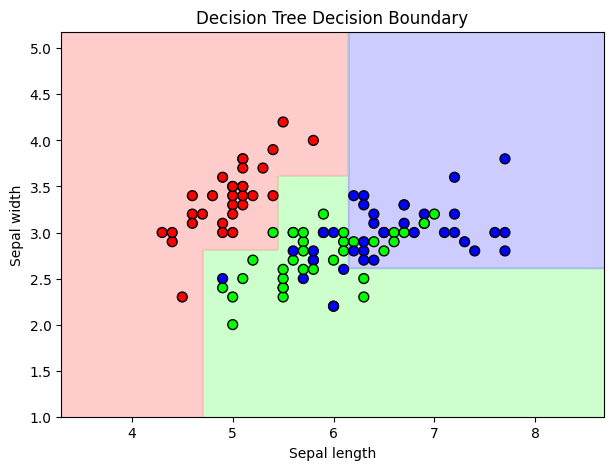

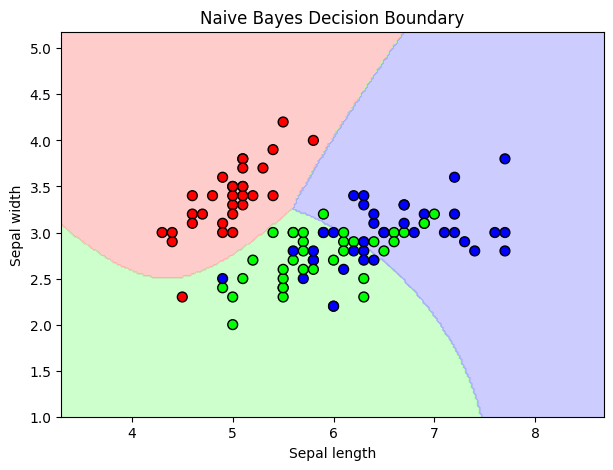

In [8]:
plot_decision_boundary(tree_model, X_train, y_train, "Decision Tree Decision Boundary")
plot_decision_boundary(nb_model, X_train, y_train, "Naive Bayes Decision Boundary")

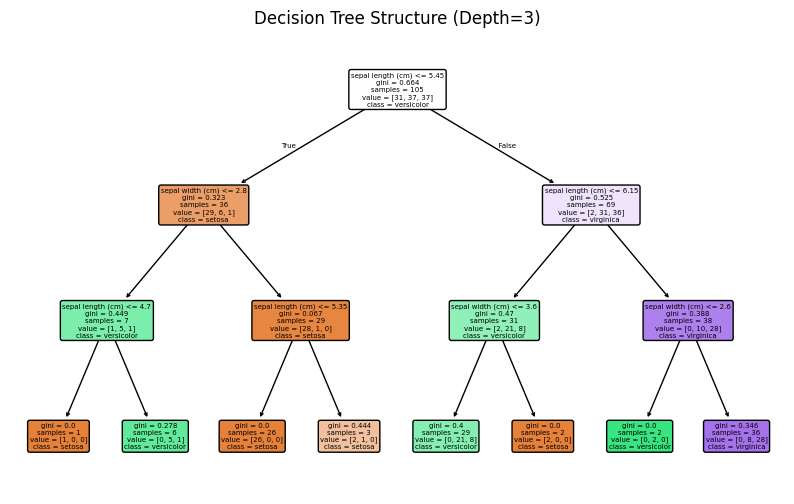

In [9]:
plt.figure(figsize=(10, 6))
plot_tree(tree_model, feature_names=iris.feature_names[:2],
          class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree Structure (Depth=3)")
plt.show()